In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatLogSlider, IntSlider
import matplotlib.animation as animation
import math
%matplotlib inline
%matplotlib notebook

# Section 2: Tidal Disruption Events (TDEs)

## 2.0 Introduction

Tidal Disruption Events (TDEs) are one of the most bright and dramatic spectacles in which a star travels too close to a black hole (BH) and gets tidally ripped apart. Part of the doomed star will be accreted onto the BH causing a flare of emission. In this section, we are going to simulate stars' trajectories on a 2D plane in both Newtonian method and Schwarzschild Metric method.

In section 2.1, we will approximate the star as a point mass and perform newtonian simulation. Section 2.2 will use the 2.1 result and simulate 4 non-interating point masses as a non-rotating star and observe the TDE in the animation. In seciton 2.3, we will use Schwarzschild Metric to simulate a more realistic point mass star model near the BH. In section 2.4, we will use the results from section 2.3 to simulate a TDE by approximating the star using the same method outlined in section 2.2. Finally, in section 2.5, we give a conclusion and the future work.

NOTE: This notebook makes use of MatPlotLib 3.3.4 (this is important because newer versions of MatPlotLib deprecated some features this notebook relies off of)

## 2.1 Newtonian Point mass Star Simulation

In this section, we are going to simulate the star as a point mass near a BH using Newtonian methods. 

We first define some useful constant for later calculation:

In [2]:
G = 6.67*10**(-11) # in SI units
c = 299792458 # meters/second
Ms = 2e30 # mass of the Sun

We define the following variables to bound the simulation with initial conditions:
- M: the mass of the black hole
- m: the mass of the star
- Rstar: the radius of the star
- rs: Schwarzschild radius of the BH
- x0: the initial x position
- y0: the initial y position
- vx0: the initial x velocity
- vy0: the initial y velocity

In [3]:
M = 20*Ms
m = 10 * Ms
Rstars = 7e8
rs = 2*G*M/c**2
x0 = 0 #m
y0 = 20*rs #m
vx0 = -3000000 #m/s
vy0 = 0 #m/s

We can update the star's position $\vec{r}$ using the velocity at half the time interval $\vec{v_{half}}$ and the previous $\vec{r}$, $\vec{v_{half}}$ using the acceleration $\vec{a}$ and the previous $\vec{v_{half}}$, and $\vec{a}$ by finding $\vec{F} = m \vec{a}$ and the gravitational force from blackhole $\vec{F} = $
$\frac{\left(GMm\right)}{r^{2}}$. 

$$
r_{i} = r_{i-1} + v_{half, i-1} \times dt
$$
$$
v_{half, i} = v_{half, i-1} + a_{i-1} \times dt
$$
$$
a_{i} = \frac{GM}{r^{2}}
$$

For each iteration, we update all the quantities in both $x$ and $y$ directions, save the x and y positions into x_array and y_array, and add 1 to the counter n. We set the ending point to be either the star enters the event horizon, or there are more than  10000 iteration. <br>

The function newtonian below implements these iterations. It takes in initial conditions of position, velocity, and BH mass, and will output four arrays: x and y positions of the star, and x and y positions of the Schwarzschild radius.

In [4]:
def newtonian(x0,y0,vx0,vy0, M):
    '''Given the initial conditions, '''
    rs = 2*G*M/c**2
    x = x0
    y = y0
    vx = vx0
    vy = vy0
    x_array = [x]
    y_array = [y]
    n = 0
    r = np.sqrt(x**2 + y**2)
    a = -G * M / (r**2)
    a_x = a * x / r
    a_y = a * y / r
    vx_half = vx + 0.5 * a_x * dt
    vy_half = vy + 0.5 * a_y * dt
    while np.sqrt(x**2 + y**2) > rs and n <=10000:
        x = x + vx_half * dt
        y = y + vy_half * dt
        r = np.sqrt(x**2 + y**2)
        a = -G * M / (r**2)
        a_x = a * x / r
        a_y = a * y / r
        vx_half = vx_half + a_x * dt
        vy_half = vy_half + a_y * dt
        x_array.append(x)
        y_array.append(y)
        n += 1
    x_array = np.array(x_array)
    y_array = np.array(y_array)
    theta = np.linspace(0, 2 * np.pi, 100)
    rsx = rs * np.cos(theta)
    rsy = rs * np.sin(theta)
    return x_array, y_array, rsx, rsy

As an example, we plot 3 different initial conditions falling into a $20M_{\odot}$ BH using the function above. Note that the unit of the position is in $R_s$, the Schwarzschild radius. In this case, $R_s \approx 59300 m$. The red path has a initial position $(0,20)$ and initial velocity $(-3*10^6, 0) m/s$. The orange path has a initial position $(0,10)$ and same initial velocity as the red one. The green path has a initial position $(-4,8)$ and initial velocity $(3*10^7, 0) m/s$. <br>

We can see that all paths lead inside the event horizon, so the stars are all captured by the blackhole eventually. The initial distances of are not far away enought to complete a full 360 degree cycle.The path can be both clockwise and counterclockwise. It is not obvious on the plot, but at the end of the simulation, the speeed of the star exceeds the speed of the light.

<IPython.core.display.Javascript object>


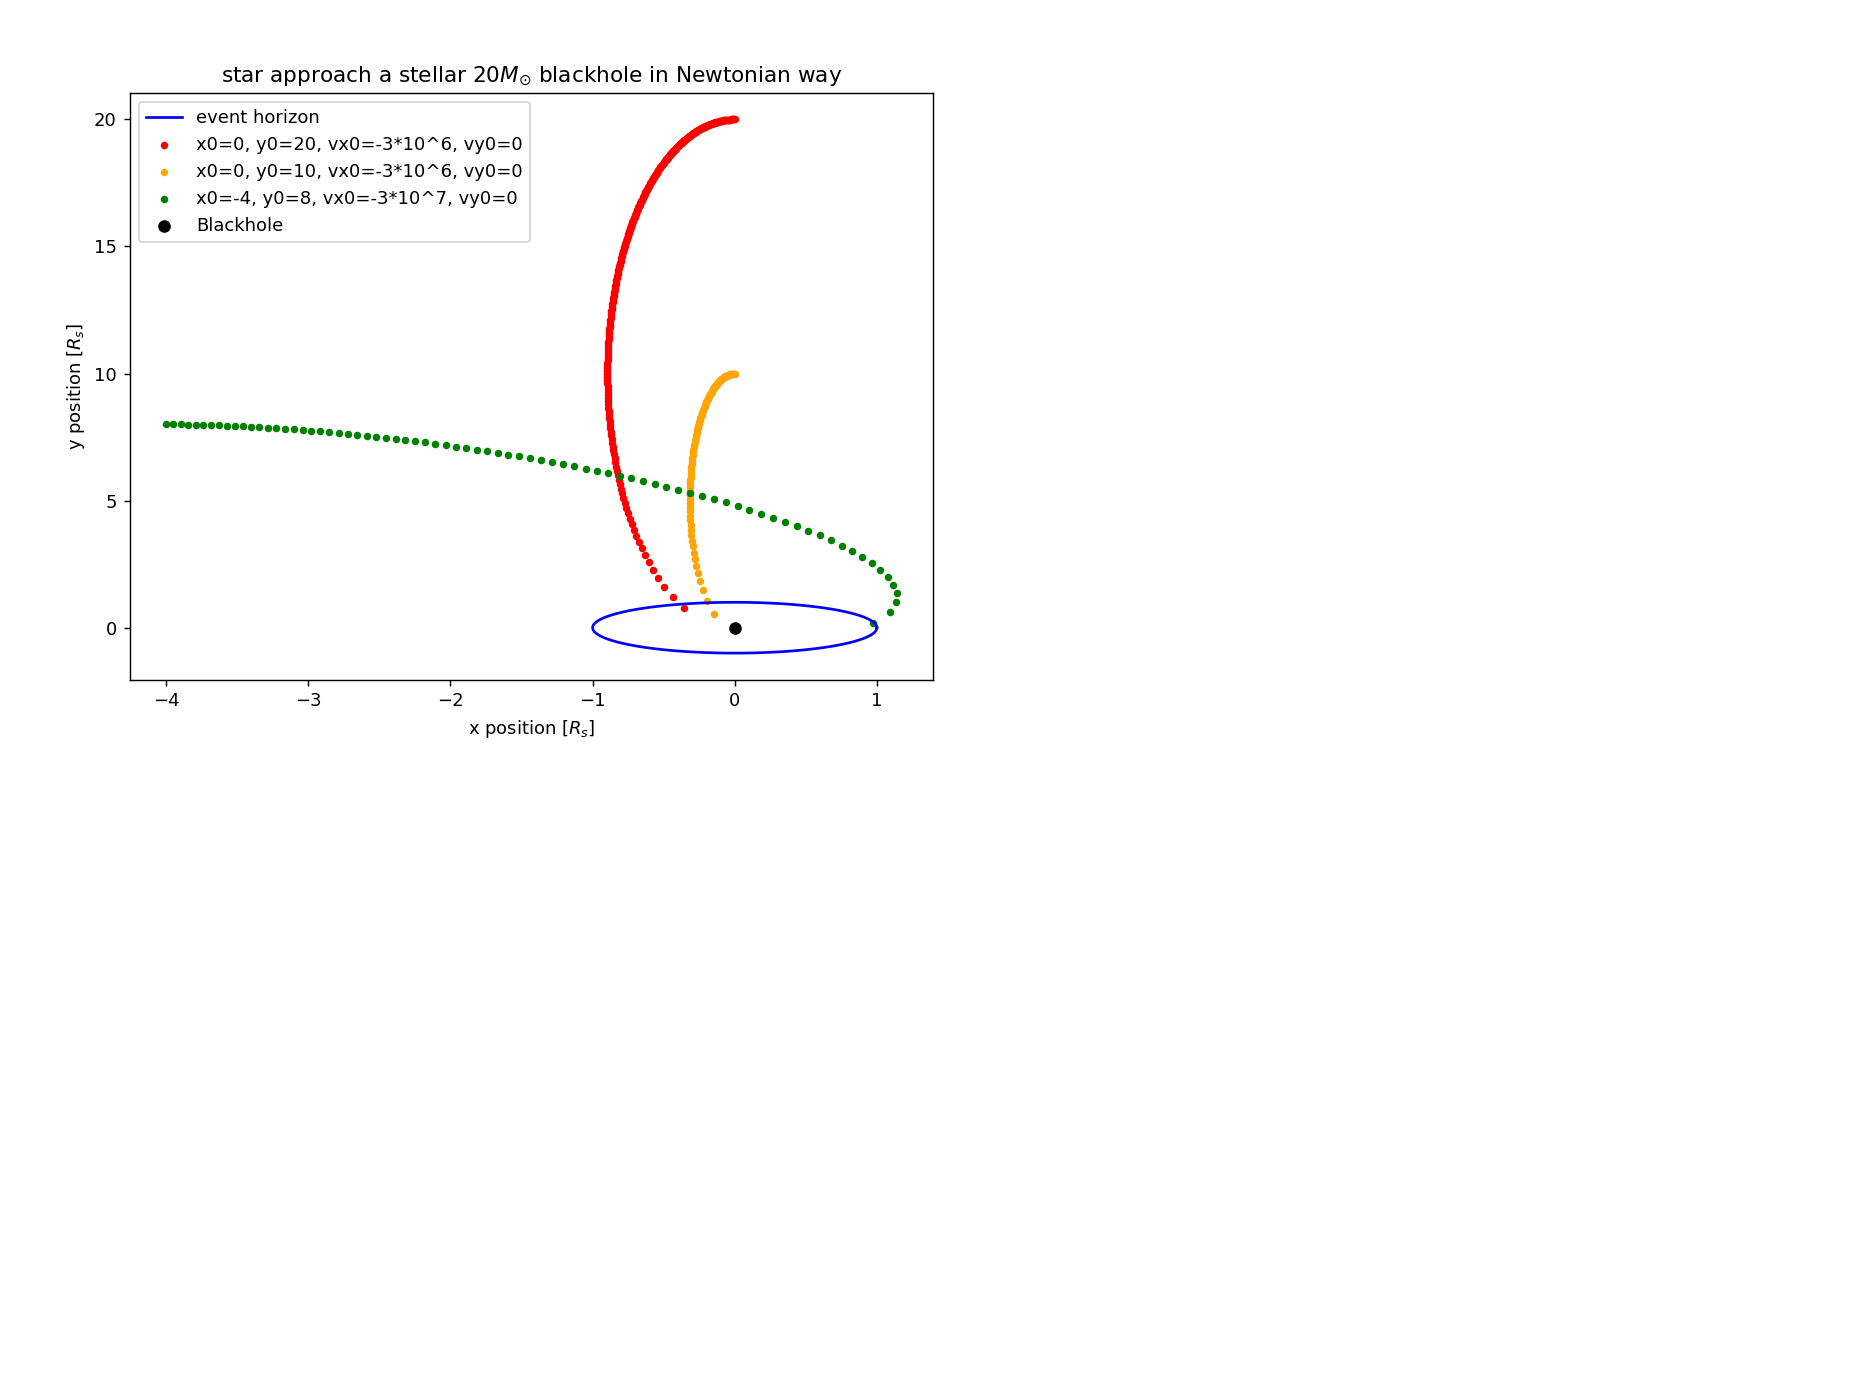

In [5]:
dt = 0.0001
x_array, y_array, rsx, rsy = newtonian(x0,y0,vx0,vy0, M)
x_array2, y_array2, rsx, rsy = newtonian(0,10*rs,vx0,vy0, M)
x_array3, y_array3, rsx, rsy = newtonian(-4*rs,8*rs,3e7,vy0, M)
plt.figure(figsize = (8,6))
plt.scatter(x_array/rs, y_array/rs, s = 10, c = 'r', label = "x0=0, y0=20, vx0=-3*10^6, vy0=0")
plt.scatter(x_array2/rs, y_array2/rs, s = 10, c = 'orange', label = "x0=0, y0=10, vx0=-3*10^6, vy0=0")
plt.scatter(x_array3/rs, y_array3/rs, s = 10, c = 'green', label = "x0=-4, y0=8, vx0=-3*10^7, vy0=0")
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
plt.legend()
plt.title(r'star approach a stellar $20M_{\odot}$ blackhole in Newtonian way')
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]");

The figure below is an animation of the three same initial condition stars. Run the cell below to see the time dimension of the star path. <br>

We can see that the closer the star is to the BH, the faster it moves. However, we know from time dilation that the star should appear slow down near the BH. The reason might be that this simulation doesn't consider relativistic effect of stars moving close to the speed of light nor general relativity. Thus, the closer to the BH, the less accurate the prediction is.

<IPython.core.display.Javascript object>


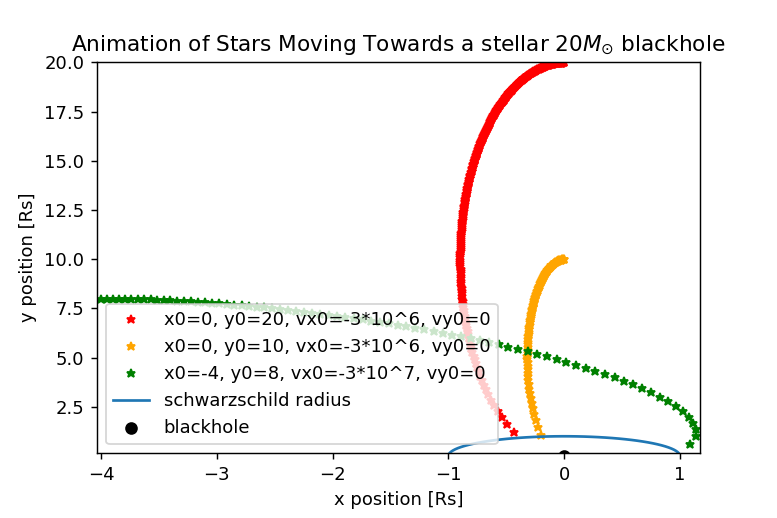

In [6]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], '*', color='red', markersize=5, label = "x0=0, y0=20, vx0=-3*10^6, vy0=0")
line2, = ax.plot([], [], '*', color='orange', markersize=5, label = "x0=0, y0=10, vx0=-3*10^6, vy0=0")
line3, = ax.plot([], [], '*', color='green', markersize=5, label = "x0=-4, y0=8, vx0=-3*10^7, vy0=0")
allx = np.concatenate([x_array, x_array2, x_array3])
ally = np.concatenate([y_array, y_array2, y_array3])
ax.set_xlim((np.min(allx)-2000)/rs, (np.max(allx) + 2000)/rs)
ax.set_ylim((np.min(ally)-2000)/rs, (np.max(ally) + 2000)/rs)
def init():
    ax.scatter(0,0, c = 'k', label = "blackhole")
    plt.plot(rsx/rs,rsy/rs, label = "schwarzschild radius")
    plt.legend()
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3
def update(frame):
    if frame < len(x_array):
        line1.set_data((x_array[:frame])/rs, (y_array[:frame])/rs)
    if frame < len(x_array2):
        line2.set_data(x_array2[:frame]/rs, (y_array2[:frame])/rs)
    if frame < len(x_array3):
        line3.set_data(x_array3[:frame]/rs, (y_array3[:frame])/rs)
    return line1, line2, line3
ani = animation.FuncAnimation(fig, update, frames=len(x_array), init_func=init, blit=True, repeat=False, interval = 10)
ax.legend()
ax.title.set_text('Animation of Stars Moving Towards a stellar $20M_{\odot}$ blackhole')
plt.xlabel("x position [Rs]")
plt.ylabel("y position [Rs]")
plt.show()

Different initial conditions yield different paths. A star can travel clockwise or counterclockwise around the BH and eventually fall into the event horizon like the figure above, or it can have elliptical orbit and pass the blackhole very closely many times without fall below the event horizon. As the figure below shown, the star travels a very complicated recession path. The start position of this simulation is denoted by the blue dot, and the end point is denoted y the orange dot. Note that it stops at orange dot because the simulation reached 10000 iterations but not because of the star is captured by the blackhole. <br>

In addition, I don't think this simulation is accurate, because the recession should not occur in the newtonian simulations. This is probably caused that the dt is not small enough, causing the star to turn too much when it's close to the BH. 

<IPython.core.display.Javascript object>


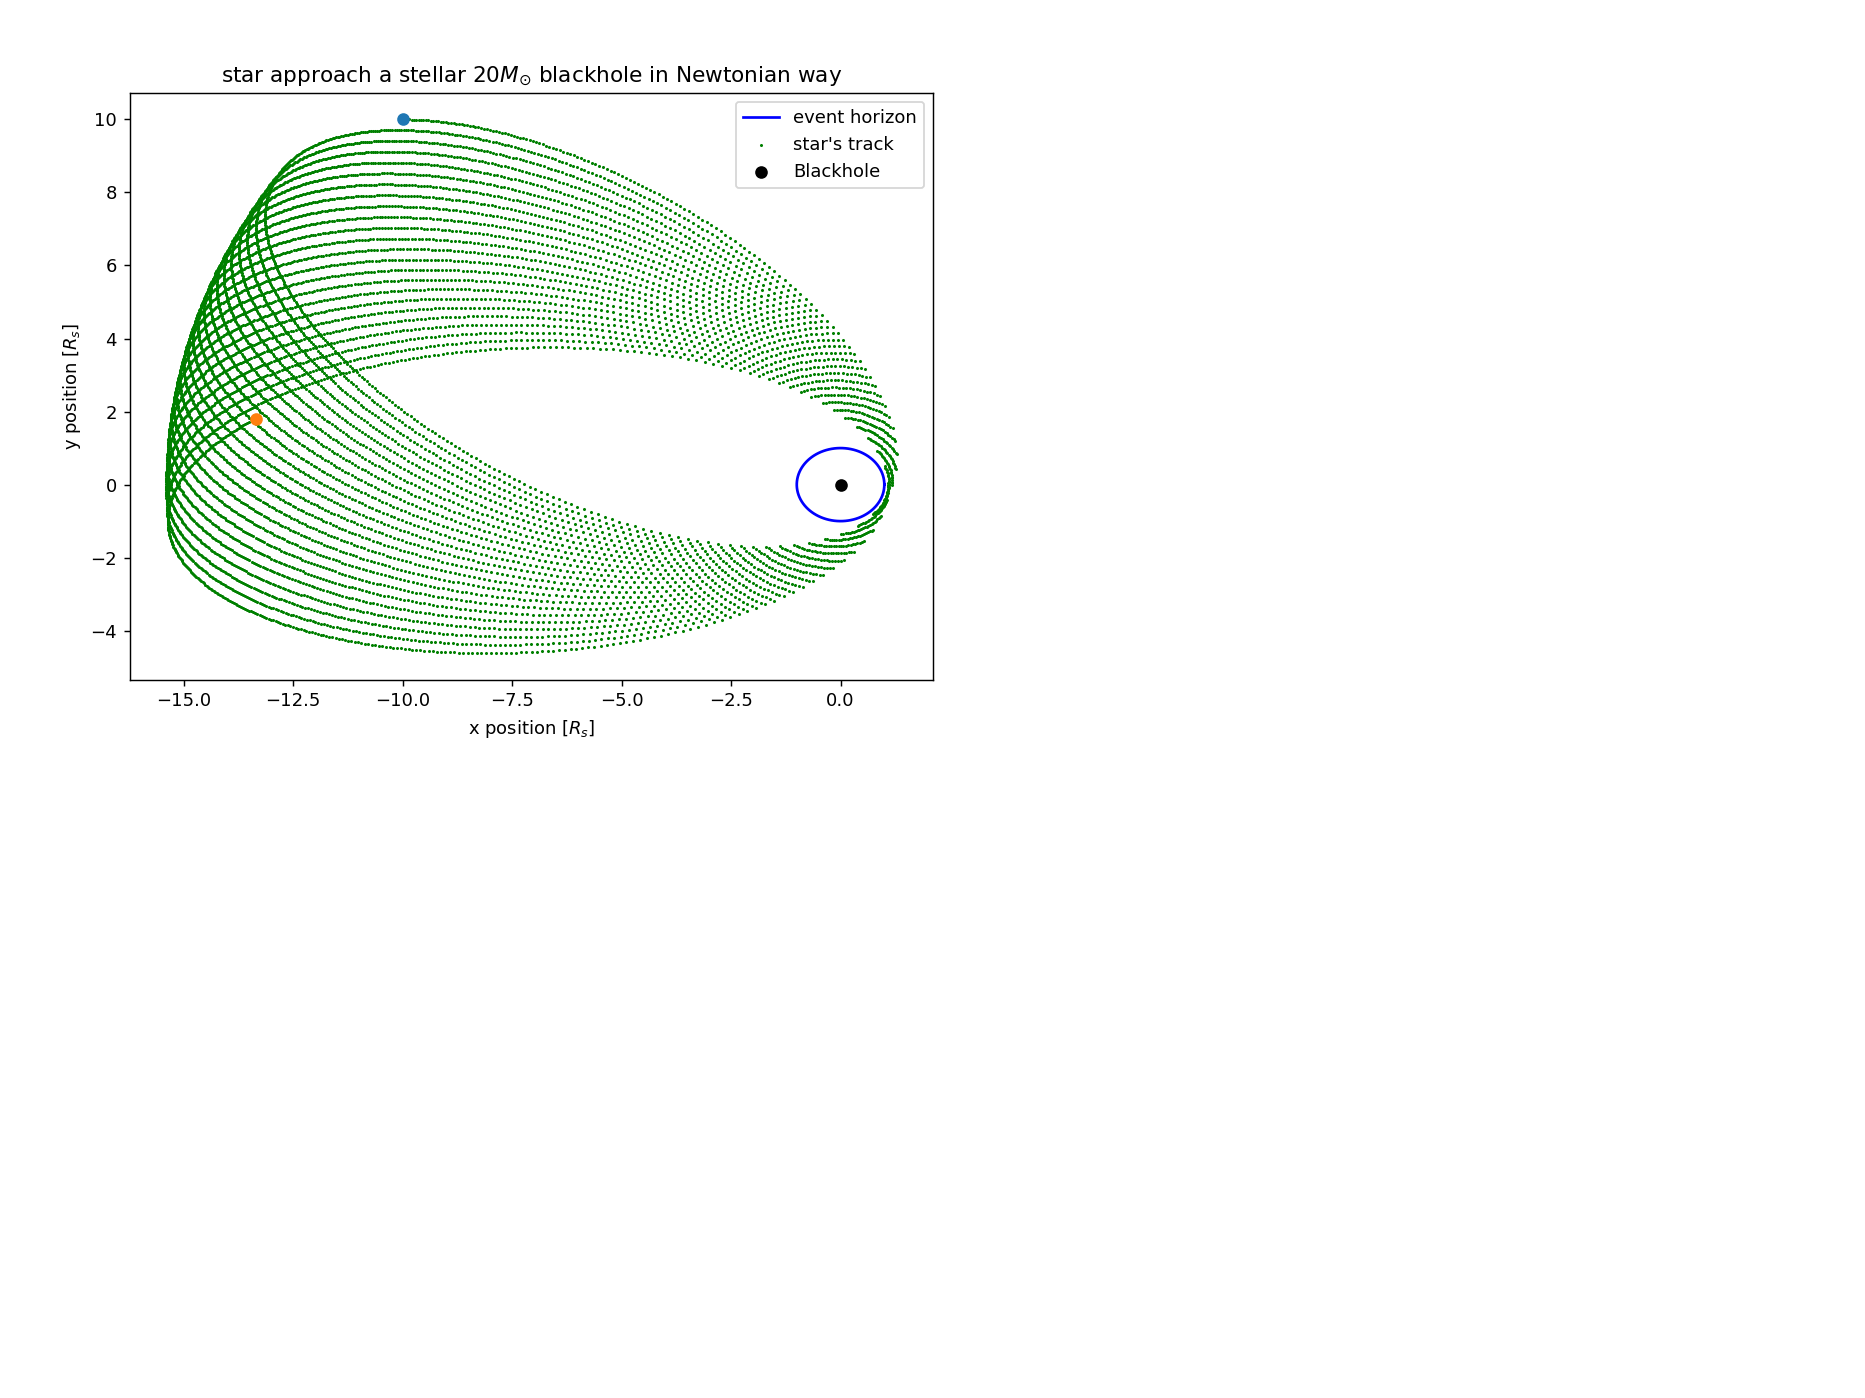

In [7]:
plt.figure(figsize = (8,6))
x_array4, y_array4, rsx, rsy = newtonian(-10*rs,10*rs,3e7,vy0, M)
plt.scatter(x_array4/rs, y_array4/rs, s = 0.5, c = 'green', label = "star's track")
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.scatter(x_array4[0]/rs, y_array4[0]/rs)
plt.scatter(x_array4[-1]/rs, y_array4[-1]/rs)
plt.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
plt.legend()
plt.title(r'star approach a stellar $20M_{\odot}$ blackhole in Newtonian way')
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]");

&nbsp;&nbsp;&nbsp;&nbsp; We only provide four different initial conditions in the figures above. Here is an interactive slider figure so that you can check out the different star paths simulated newtonianly by changing the mass of the BH, initial positions, and initial velocities. 

In [8]:
def plot_function(MBH, vx, vy, x0, y0):
    M = MBH * Ms
    rs = 2*G*M/c**2
    x = x0 * rs
    y = y0 * rs
    x_array = [x]
    y_array = [y]
    x_array, y_array, rsx, rsy = newtonian(x,y,vx,vy, M)
    plt.figure(figsize = (8,6))
    plt.scatter(x_array/rs, y_array/rs, s = 10, c = 'r', label = "particle's track")
    plt.title('Trajectory of a star Moving Towards a Black Hole')
    plt.scatter(0,0, c = 'k', label = "Blackhole")
    plt.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
    plt.xlabel("x position [Rs]")
    plt.ylabel("y position [Rs]")
    plt.legend()
    plt.show()

In [9]:
# super massive Mass blackhole
interactive_plot = interactive(plot_function, MBH=IntSlider(min=4, max=20, step=1, description=r'Mass [$M_{\odot}$]'), 
                               vx = FloatLogSlider(value=2e5, base=10, min=0, max=7, step=0.5, description=r'$v_x$[m/s]'), 
                               vy = FloatLogSlider(value= 0, base=10, min=0, max=7, step=0.5, description=r'$v_y$[m/s]'),
                               x0 = IntSlider(value = 0, min=2, max=20, step=2, description=r'$x_{0} [rs]$'), 
                               y0 = IntSlider(value = 20, min=2, max=20, step=2, description=r'$y_{0} [rs]$'))
interactive_plot

interactive(children=(IntSlider(value=4, description='Mass [$M_{\\odot}$]', max=20, min=4), FloatLogSlider(val…

## 2.2 Newtonian non-interacting point masses star simulation

In order to observe the stars being ripped apart and fall in pieces (TDE), we cannot treat it as a point mass. For a more realistic model, let's treat the star as 4 non-interacting point masses separated by the diameter of the non-rotating star. The four point masses are located at left, right, up, and down of the star. We ignore the gravity pull between the 4 parts. It's a relatively valid approximation especially when it's near the BH and the gravitational force of the BH is much larger than that between the point mass.

In this simulation, we use a $1*10^5 M_{\odot}$ BH and a small star similar to Proxima Centauri that has a radius $\approx 0.15 R_{\odot}$. We simulate four point masses separately with the same initial velocity $(-5*10^6, 0) m/s$ but different initial positions. The center of mass of the star is located at $(3.2,5) R_s$, where $R_s \approx 3*10^8 m$.

The figure below shows the paths of the four point masses, AKA the star, falling into the blackhole. The blue dots shows the initial position, and the cyan dots are one middle step position. We can see that the star no longer keep its original shape as it gets closer and closer to the BH. It gets stretched out more as a line, matching with the spaghettification phenomenon often described in theories of extreme gravitational fields.

<IPython.core.display.Javascript object>


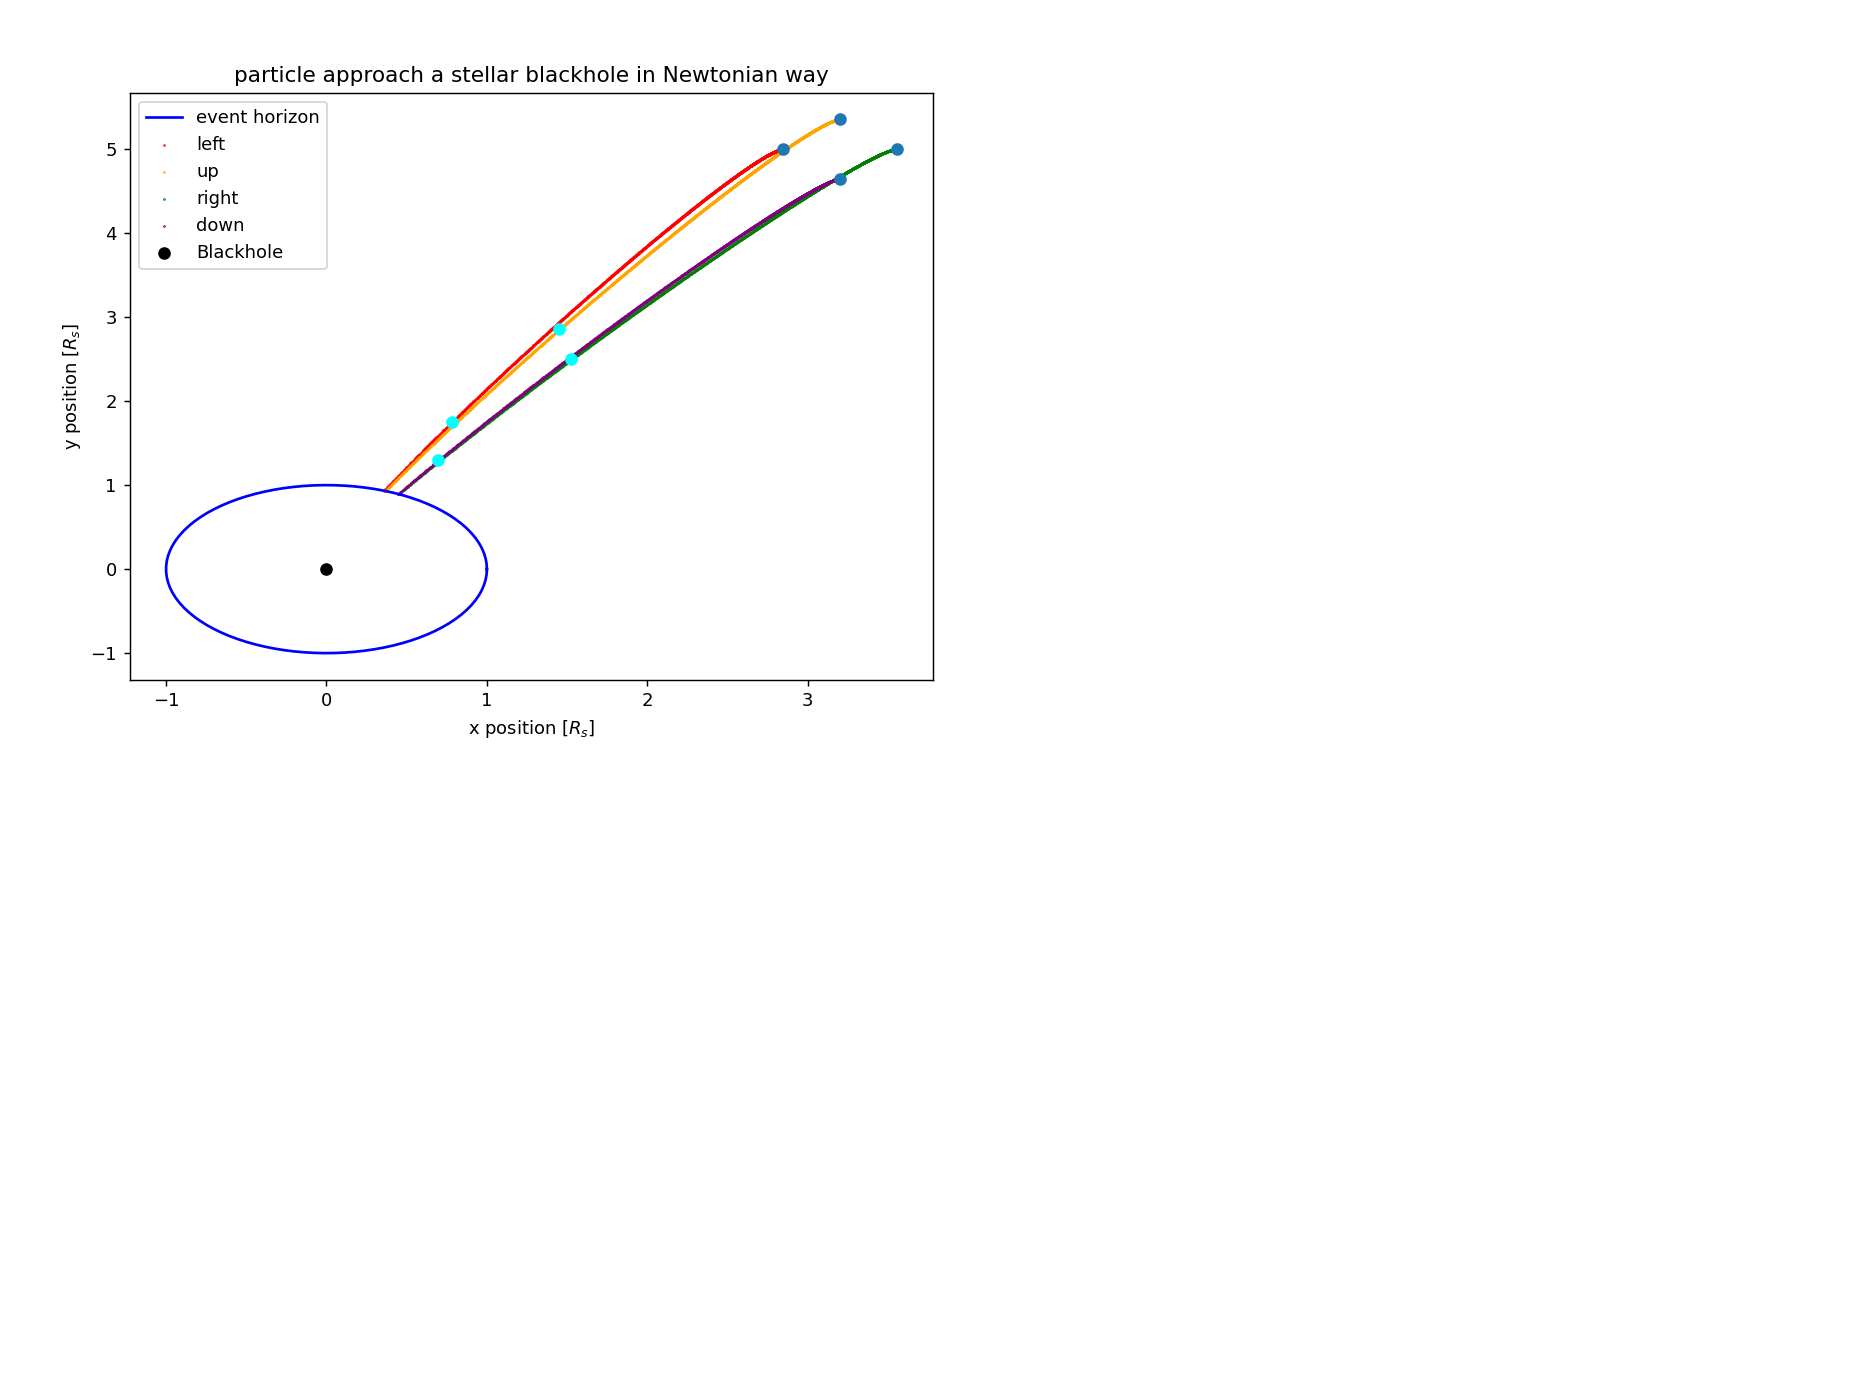

In [10]:
M = 1e5*Ms
rs = 2*G*M/c**2
x0,y0,vx0,vy0 = 3.2*rs, 5*rs, -5e6, 0
dt = 0.01
Rstar = 0.15*Rstars
x_arrayA, y_arrayA, rsx, rsy = newtonian(x0-Rstar,y0,vx0,vy0, M)
x_arrayB, y_arrayB, rsx, rsy = newtonian(x0,y0+Rstar,vx0,vy0, M)
x_arrayC, y_arrayC, rsx, rsy = newtonian(x0+Rstar,y0,vx0,vy0, M)
x_arrayD, y_arrayD, rsx, rsy = newtonian(x0,y0-Rstar,vx0,vy0, M)
plt.figure(figsize = (8,6))
plt.scatter(x_arrayA/rs, y_arrayA/rs, s = 0.2, c = 'r', label = "left")
plt.scatter(x_arrayB/rs, y_arrayB/rs, s = 0.2, c = 'orange', label = "up")
plt.scatter(x_arrayC/rs, y_arrayC/rs, s = 0.2, c = 'green', label = "right")
plt.scatter(x_arrayD/rs, y_arrayD/rs, s = 0.2, c = 'purple', label = "down")
plt.scatter([x_arrayA[0]/rs,x_arrayB[0]/rs, x_arrayC[0]/rs, x_arrayD[0]/rs], [y_arrayA[0]/rs, y_arrayB[0]/rs, y_arrayC[0]/rs, y_arrayD[0]/rs])
plt.scatter([x_arrayA[1900]/rs,x_arrayB[1900]/rs, x_arrayC[1900]/rs, x_arrayD[1900]/rs], [y_arrayA[1900]/rs, y_arrayB[1900]/rs, y_arrayC[1900]/rs, y_arrayD[1900]/rs], c = 'cyan')
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
plt.legend()
plt.title("particle approach a stellar blackhole in Newtonian way")
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]");

The figure below is an animation of the simulation. Run the cell below to see the time dimension of the star's path.

We can see that the 4 parts are moving tranlsationally at start, but get stretched by the strong tidal force later in the simulation, reaching the BH in the sequence of down, left, right, up. The spaghettification phenomenon can be observed clearly at the late time of this simulation, as the 4 parts are almost stretched radially to a line. The problem that closer the star is to the BH, the faster it moves still remains in this simulation, since we didn't include relativistic effect or general relativity.

<IPython.core.display.Javascript object>


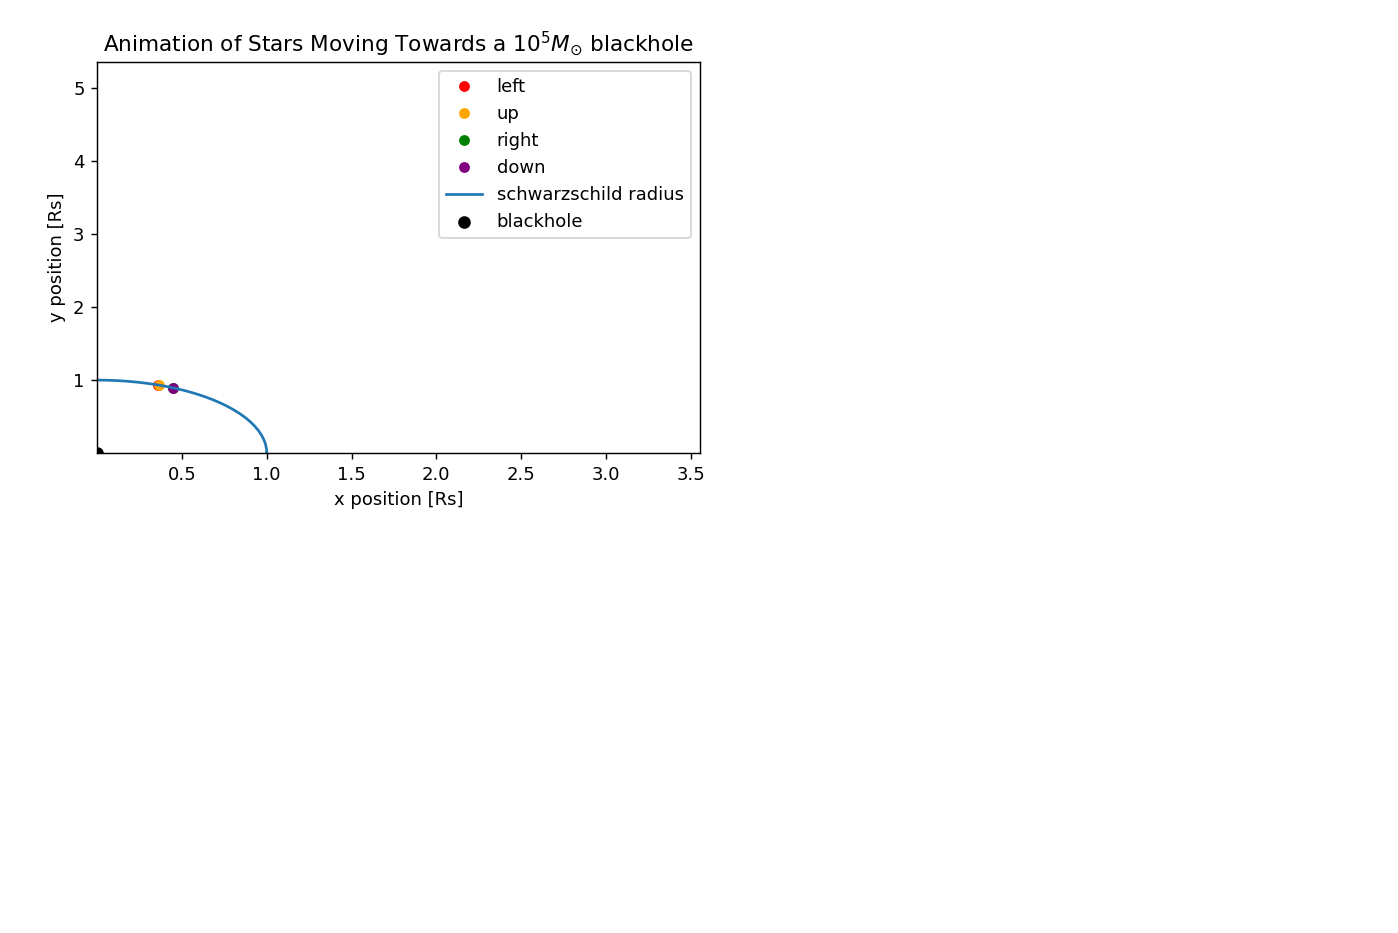

In [11]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], 'o', color='red', markersize=5, label = "left")
line2, = ax.plot([], [], 'o', color='orange', markersize=5, label = "up")
line3, = ax.plot([], [], 'o', color='green', markersize=5, label = "right")
line4, = ax.plot([], [], 'o', color='purple', markersize=5, label = "down")
allx = np.concatenate([x_arrayA, x_arrayB, x_arrayC, x_arrayD])
ally = np.concatenate([y_arrayA, y_arrayB, y_arrayC, y_arrayD])
ax.set_xlim(2000/rs, (np.max(allx) + 2000)/rs)
ax.set_ylim(2000/rs, (np.max(ally) + 2000)/rs)
def init():
    ax.scatter(0,0, c = 'k', label = "blackhole")
    plt.plot(rsx/rs,rsy/rs, label = "schwarzschild radius")
    plt.legend()
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4,
def update(frame):
    if frame < len(x_arrayA[1::2]):
        line1.set_data((x_arrayA[1::2][frame])/rs, (y_arrayA[1::2][frame])/rs)
    if frame < len(x_arrayB[1::2]):
        line2.set_data(x_arrayB[1::2][frame]/rs, (y_arrayB[1::2][frame])/rs)
    if frame < len(x_arrayC[1::2]):
        line3.set_data(x_arrayC[1::2][frame]/rs, (y_arrayC[1::2][frame])/rs)
    if frame < len(x_arrayD[1::2]):
        line4.set_data(x_arrayD[1::2][frame]/rs, (y_arrayD[1::2][frame])/rs)
    return line1, line2, line3, line4,
ani = animation.FuncAnimation(fig, update, frames=len(x_arrayB[1::2]), init_func=init, blit=True, repeat=False, interval = 1)
ax.legend()
ax.title.set_text('Animation of Stars Moving Towards a $10^5 M_{\odot}$ blackhole')
plt.xlabel("x position [Rs]")
plt.ylabel("y position [Rs]")
plt.show()

## 2.3 Schwarzschild Metric Point Mass Star Simulation

From the previous sections, we observe that while the Newtonian mechanics and the classical concepts of gravity provide a correct general trend of the star's track, the closer the star gets to the BH, the less accurate thre predicted result is. The huge mass of the BH will distort the spacetime and lack of relativistic effect make the classical way no longer suitable for BH simulations.

In this section, we are going to simulate the 2D star trajectory of a star falling into the blackhole using Schwarzschild Metric. Schwarzchild metric describes the spacetime around a spherical mass $M$, and it allows us to calculate the metric of spacetime given some distribution of mass. We use polar coordinate to derive and implement the formula used in this simulation.

For plotting purpose, we convert polar coordinates to cartesian coordinates using the function polartocartesian below.

In [12]:
def polartocartesian(r, theta):
    # returns two arrays: one describing the position in the x axis, and the other, the y axis. 
    # x[i] corresponds to y[i] for i in len(listtheta)
    x_array = r * np.cos(theta)
    y_array = r * np.sin(theta)
    return x_array, y_array

The Schwarzschild metric is defined as follows:
$$
ds^2 = -c^2d\tau^2 =-\left(1 - \frac{r_s}{r}\right) c^2 dt^2 + \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 (d\theta^2 + \sin^2\theta \, d\phi^2) \tag{1}
$$

We want to work with proper time $d\tau$, so we divide both sides by $c^2$. Moreover, we will consider the paths that lie in the equatorial plane, so $\theta = \pi/2$ and $d\theta = 0$. Plugging these to equation 1, we have
$$
 d\tau^2 =-\frac{ds^2}{c^2} = \left(1 - \frac{r_s}{r}\right) dt^2 - \frac{1}{c^2}\frac{dr^2}{\left(1 - \frac{r_s}{r}\right)} - \frac{r^2}{c^2} d\phi^2 \tag{2}
$$
Divide both side by $d\tau^2$, we get
$$
 1 = \left(1 - \frac{r_s}{r}\right) \left(\frac{dt}{d\tau}\right)^2 - \frac{1}{c^2}\left(\frac{dr}{d\tau}\right)^2 \frac{1}{\left(1 - \frac{r_s}{r}\right)} - \frac{r^2}{c^2} \left(\frac{d\phi}{d\tau}\right)^2 \tag{3}
$$

Since the metric is independent with $\phi$ and $t$, we can write two constant motion geodesics as equation 4 and 5
$$
\frac{d\phi}{d\tau} = \frac{L}{mr^2} \tag{4}
$$

$$
\frac{dt}{d\tau} = \frac{E}{mc^2} \frac{1}{1-\frac{rs}{r}} \tag{5}
$$
where $L$ is the angular momentum of the star, defined as
$$
L = mr^2 \frac{d\phi}{dt} \tag{6}
$$
and $E$ is the total energy of the star. Note that it is defined differently compare to the newtonian summation of kinetic energy, rotational energy, and potential energy. 
$$
E = mc^2 \sqrt{1+\frac{1}{c^2} \left(1 - \frac{dr}{d\tau}\right)^2+\frac{2}{mc^2}V_{eff}} \tag{7}
$$
where
$$
V_{eff} = -\frac{GMm}{r} + \frac{L^2}{2mr^2} - \frac{L^2 GM}{r^3 mc^2} \tag{8}
$$
Squaring the geodesics equation 4 and 5, and inserting them into equation 3, we can solve for $\frac{dr}{d\tau}$, which follows the relation

$$
\frac{dr}{d\tau} = \sqrt{\frac{E^2}{m^2 c^2} - \frac{L^2}{m^2 r^2} \left(1-\frac{r_s}{r}\right) - c^2 \left(1-\frac{r_s}{r}\right)} \tag{9}
$$

We can find $dr$, $d\phi$, and $dt$, using equation 9, 4, and 5 respectively by setting $d\tau$ to be a small value. We can approximate the small changes of $r$, $\phi$, and $t$ in each step once we decide upon a small step $d\tau$. Then we can update our $r$, $\phi$, and $t$ variables by
$$
r_{i} = r_{i-1} + dr
$$
$$
\phi_{i} = \phi_{i-1} + d\phi
$$
$$
t_{i} = t_{i-1} + dt
$$

The function Schwarzschild below implements the simulation. It takes in initial conditions: position in polar coordinate $r0$ and $theta0$ (the $theta$ symbol used in the function is the same as $\phi$, representing the angular coordinate), radial and tangential verlocity $vr0$ and $vt0$, BH mass $M$, and star's mass $m$. The function will update the star's position, velocity, time, energy, and angular momentum following the formula until the star reaches event horizen $rs$ or there have been 100000 iterations. For plotting purpose, we then convert the polar $r$ and $\theta$ array into x and y arrays. The function will output five arrays: x and y positions of the star, observational time $t$ array, and x and y positions of the Schwarzschild radius.

In [13]:
def Schwarzschild(r0, theta0, vr0, vt0, M, m):
    rs = 2*G*M/c**2
    r_array = [r0]
    theta_array = [theta0]
    t_array = [0]
    n = 0
    r = r0
    t = 0
    theta = theta0
    vr = vr0
    vtheta = vt0/r
    L = m*vtheta*r
    Veff = -(G*M*m)/r + (L**2)/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
    E = m*c**2 * np.sqrt(1 + (1/c**2)*vr**2+(2/(m*c**2)*Veff))

    while np.abs(r) > rs and n <=100000:
        dr = - (dtau * (np.sqrt((E/m/c)**2 - (L/m/r)**2*(1-(rs/r)) - c**2 * (1-(rs/r)))))
        dtheta = dtau * L/(m*r**2)
        dt = E/m/c**2/(1-(rs/r)) * dtau
        r = r + dr
        theta = theta + dtheta
        t = t + dt
        r_array.append(r)
        theta_array.append(theta)
        t_array.append(t)
        vr = dr/dtau
        vtheta = vt0/r
        L = m*vtheta*r
        Veff = -G*M*m/r + L**2/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
        E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)
        n += 1

    r_array = np.array(r_array)
    theta_array = np.array(theta_array)
    t_array = np.array(t_array)
    # The data need for plotting the rs
    theta1 = np.linspace(0, 2 * np.pi, 100)
    rsx = rs * np.cos(theta1)
    rsy = rs * np.sin(theta1)
    x_array, y_array = polartocartesian(r_array, theta_array)
    return x_array, y_array, t_array, rsx, rsy

As an example, we plot a $10M_{\odot}$ star falling into a $20M_{\odot}$ BH using the function above. We set the initial conditions to be position at (20 rs, 0 rad), 0 radial velocity, and $3*10^6$ m/s tangential velocity. Note that the unit of the position is in $R_s$, the Schwarzschild radius. In this case, $R_s \approx 59300 m$. 

The left plot shows the point mass star's trajectary approaching the BH simulated using Schwarzschild Metric. To show the details, its x and y axes are not to scale. The right plot shows a comparison of the simulated track between newtonian and Schwarzchild. Its x and y axes have the same scaling. The red scattered dots show the star's track considering Schwarzschild metric, while the orange one is the Newtonian path simulated using the same initial conditions. 

We can see that both simulations give a similar trend: the star moves to the left and downward and reach the event horizon. The orange dots travels more left than the red dots, with a maximum separation about 0.8 rs ($47500m$). The interval of the orange dots become larger and larger at last, and eventually the star in the newtonian calculation travels faster than the speed of light. This never happens in the Schwarzschild Metric calculations.

<ipython-input-13-7e47fa0187e7>:30: RuntimeWarning: invalid value encountered in sqrt
  E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)


<IPython.core.display.Javascript object>


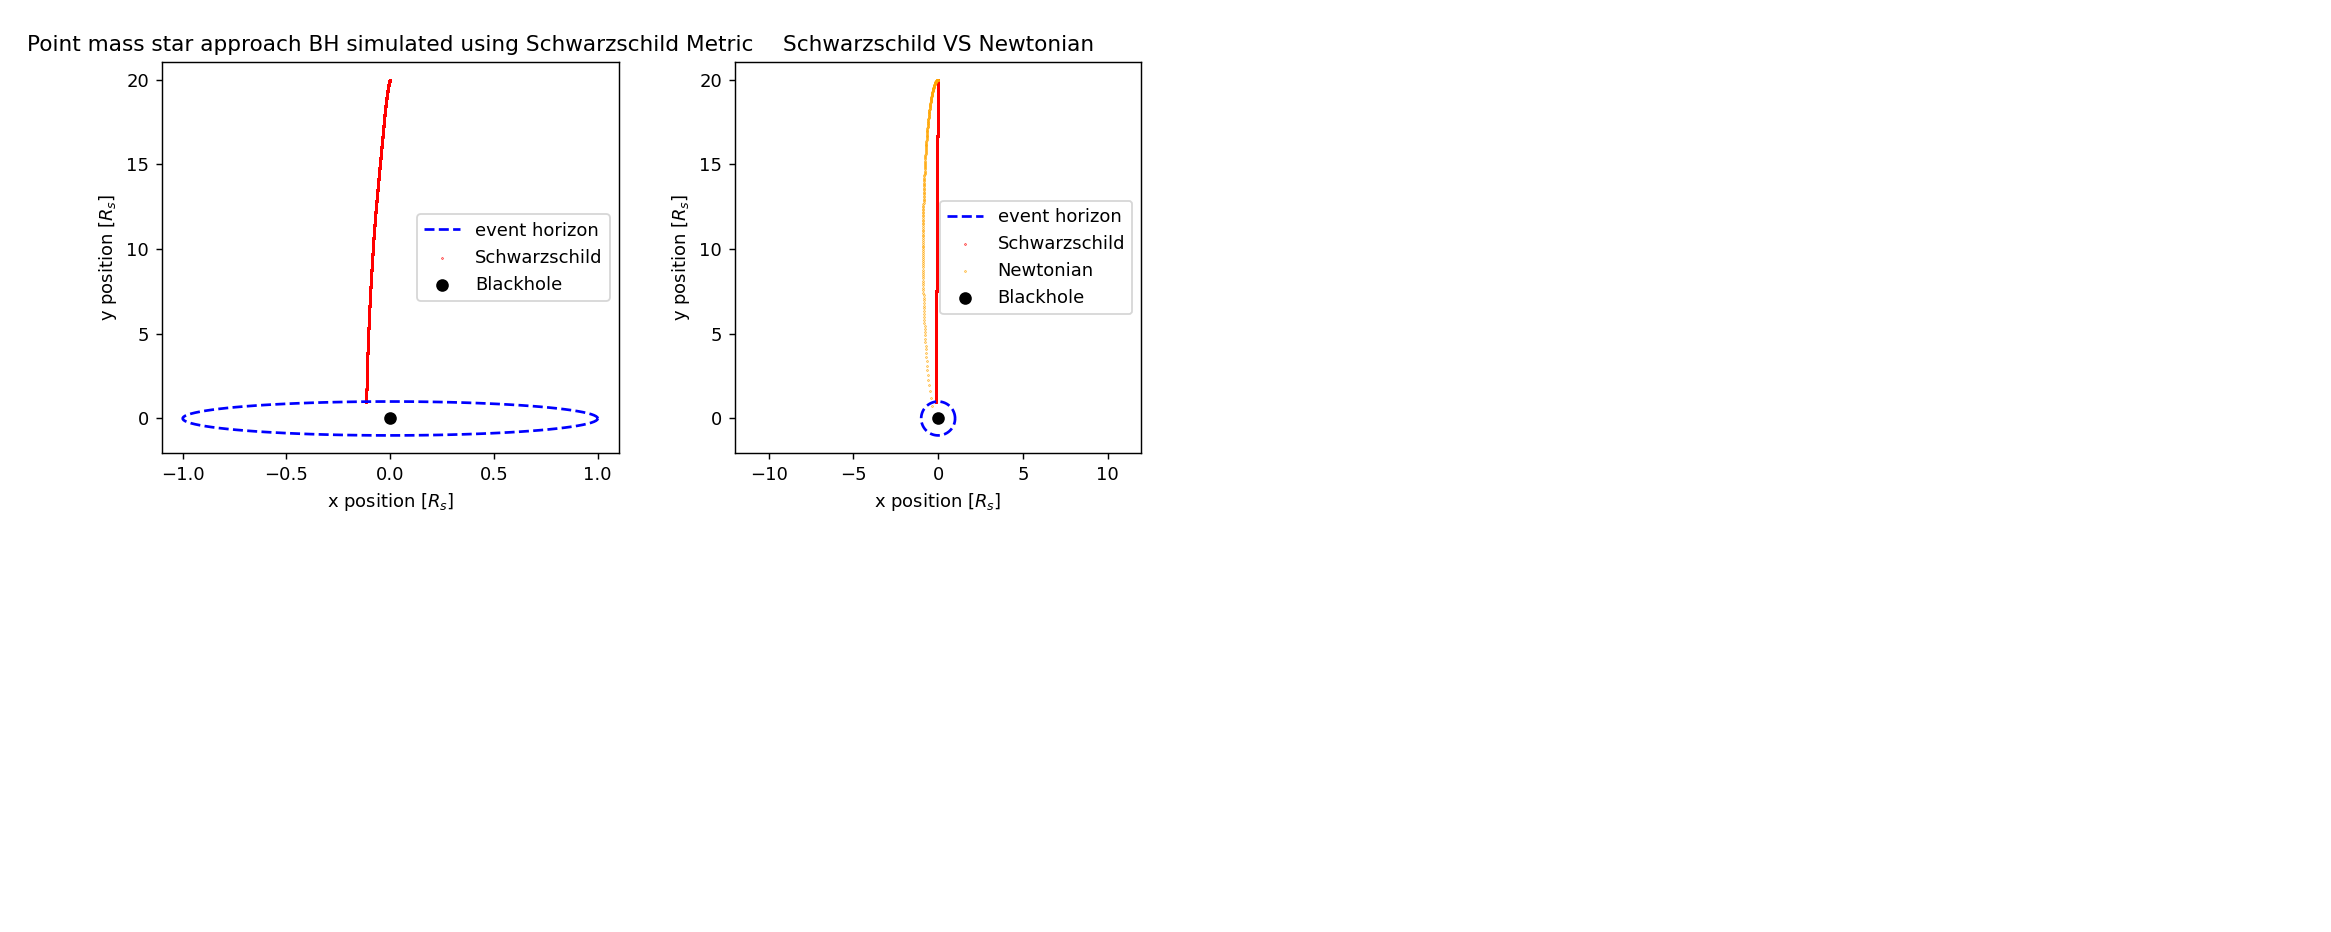

In [14]:
# initial condition
M = 20*Ms
rs = 2*G*M/c**2
m = 10*Ms
r0 = 20*rs #m
theta0 = np.pi/2
vr0 = 0 #m/s
vt0 = 3e6 #m/s
dtau = 0.1
x_array_p, y_array_p, t_array_p, rsx, rsy = Schwarzschild(r0, theta0, vr0, vt0, M, m)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(x_array_p/rs, y_array_p/rs, c = 'r', s=0.1, label = "Schwarzschild")
ax1.scatter(0,0, c = 'k', label = "Blackhole")
ax1.plot(rsx/rs,rsy/rs, '--',  c = 'blue', label = "event horizon")
ax1.legend(loc="center right")
ax1.set_title("Point mass star approach BH simulated using Schwarzschild Metric")
ax1.set_xlabel(r'x position [$R_s$]')
ax1.set_ylabel("y position [$R_s$]")
ax2.scatter(x_array_p/rs, y_array_p/rs, c = 'r', s=0.1, label = "Schwarzschild")
ax2.scatter(x_array/rs, y_array/rs, c = 'orange', s=0.1, label = "Newtonian")
ax2.set_aspect('equal', 'box')
ax2.scatter(0,0, c = 'k', label = "Blackhole")
ax2.plot(rsx/rs,rsy/rs, '--',  c = 'blue', label = "event horizon")
ax2.set_xlim(-12,12)
ax2.legend(loc="center right")
ax2.set_title("Schwarzschild VS Newtonian")
ax2.set_xlabel(r'x position [$R_s$]')
ax2.set_ylabel("y position [$R_s$]");

We can observe the time dilation effect using Schwarzschild metric simulation. The subplot below shows a $10 M_{\odot}$ point mass star approaching a $20 M_{\odot}$ BH with 0 initial velocity and start at (15,0) rs. The left plot shows the star's trajectory, which is a straight line pointing to the center of the BH. The right plot shows the y position VS time, and the slope is the star's velocity in the observer's point of view. We can see that the star accelerate gradually in the most part of the simulation, but at the end of simulation, the star slows down dramatically and eventually hit almost 0. This is the time dilation effect: the star travels slower and slower as it get closer and closer to the event horizon.

<IPython.core.display.Javascript object>


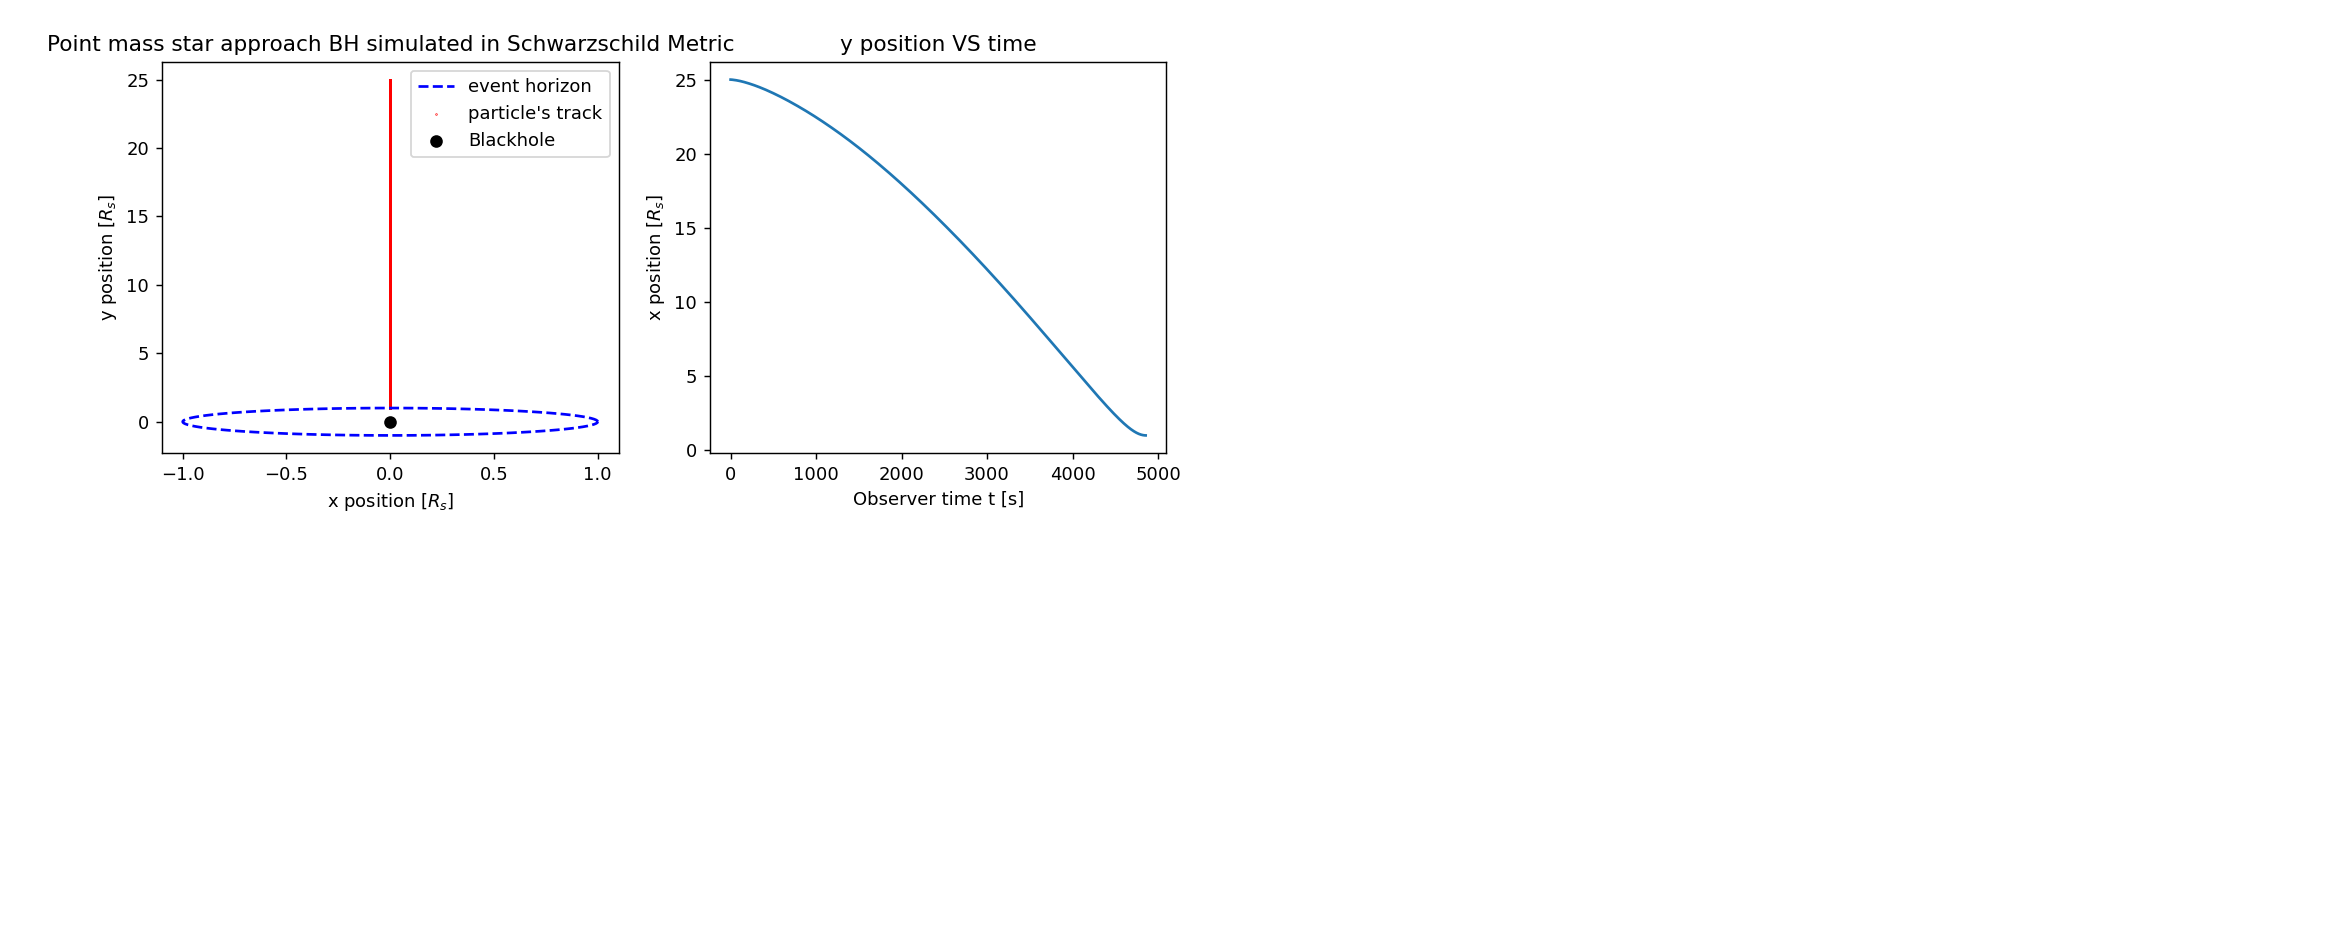

<ipython-input-13-7e47fa0187e7>:30: RuntimeWarning: invalid value encountered in sqrt
  E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)


In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
M = 20*Ms
rs = 2*G*M/c**2
m = 10*Ms
r0 = 25*rs #m
theta0 = np.pi/2
vr0 = 0 #m/s
vt0 = 0 #m/s
dtau = 0.1
x_array, y_array, t_array, rsx, rsy = Schwarzschild(r0, theta0, vr0, vt0, M, m)
ax1.scatter(x_array/rs, y_array/rs, c = 'r', s=0.1, label = "particle's track")
ax1.scatter(0,0, c = 'k', label = "Blackhole")
ax1.plot(rsx/rs,rsy/rs, '--',  c = 'blue', label = "event horizon")
ax1.legend()
ax1.set_title("Point mass star approach BH simulated in Schwarzschild Metric")
ax1.set_xlabel(r'x position [$R_s$]')
ax1.set_ylabel("y position [$R_s$]")

ax2.plot(t_array, y_array/rs);
ax2.set_title("y position VS time")
ax2.set_ylabel(r'x position [$R_s$]')
ax2.set_xlabel("Observer time t [s]");

## 2.4 Schwarzschild Metric non-interacting point masses star simulation

In this section, we will use a similar method to We put the star (4 non-interacting point masses) at the same position as the simulation in section 2.2, and give them the same initial velocity. All the initial conditions are the same beside that we add one condition - the mass of the point mass is set to be one solar mass. We conduct the simulation that individually calculate the point masses using the method in section 2.3.

We first write down the initial condition and convert the cartesian positions and velocities to polar ones using the cartesian_to_polar function.

In [16]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = math.atan2(y, x)
    return r, theta
M = 1e5*Ms
m = Ms
rs = 2*G*M/c**2
x0,y0,vx0,vy0 = 3.2*rs, 5*rs, -5e6, 0
dtau = 1000
Rstar = 0.15*Rstars
rA, thetaA = cartesian_to_polar(x0-Rstar,y0)
rB, thetaB = cartesian_to_polar(x0,y0+Rstar+0.0001*rs)
rC, thetaC = cartesian_to_polar(x0+Rstar,y0)
rD, thetaD = cartesian_to_polar(x0,y0-Rstar)

We then conduct the simulation and plot the results. The figure below shows the paths of the four point masses, AKA the star, falling into the blackhole. The blue dots shows the initial position, and the cyan dots are one middle step position.

We can see that the star no longer keep its original shape as it gets closer and closer to the BH. However, it doesn't seem to get stretched, but seems to shrink together. I think the reason might be that the simulation is not accurate enough. The $d\tau$ being used is 1000s, which is not a small step. We cannot use a smaller value, since a smaller value will cause jupyter notebook to be out of memory before finishing simulation. This simulation also have another flow due to floating-point rounding, making dr to be 0 and the star to stay in the same position. This is because $E$ at the the scale of $10^{48}$, Python switches to scientific notation after seeing such a big number, which lead to a loss of precision due to rounding. In the $dr$ calculation, we have substraction with the loss-of-precision numbers, driving the value inside the square root to be 0 or even below 0. This makes this simulation very dependent on the initial condition.

<ipython-input-13-7e47fa0187e7>:30: RuntimeWarning: invalid value encountered in sqrt
  E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)


<IPython.core.display.Javascript object>


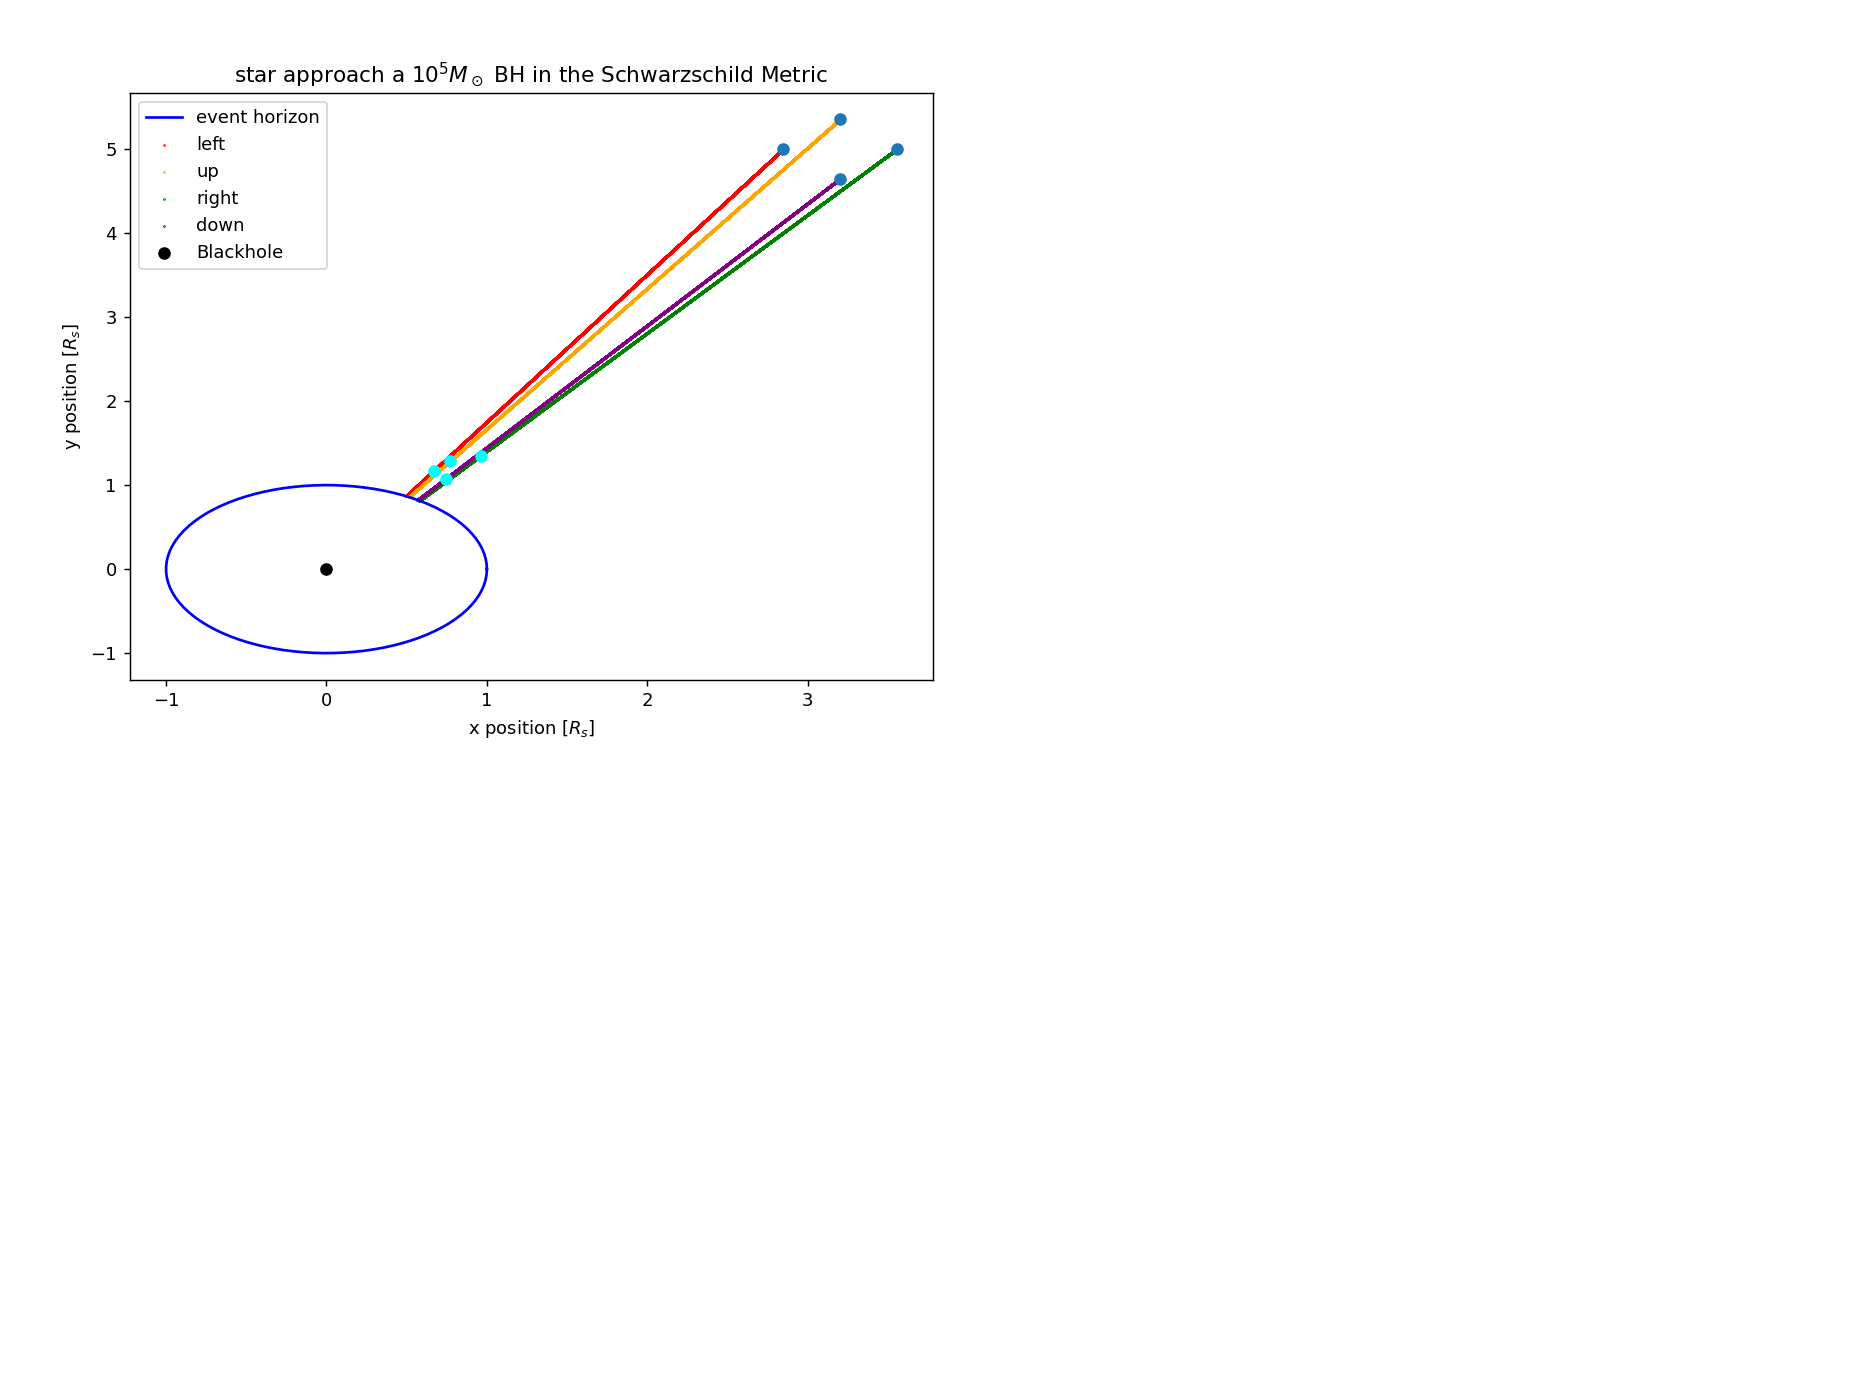

In [17]:
x_arrayA_p, y_arrayA_p, t_arrayA_p, rsx, rsy = Schwarzschild(rA, thetaA,0,vx0, M, m)
x_arrayB_p, y_arrayB_p, t_arrayB_p,  rsx, rsy = Schwarzschild(rB, thetaB,0,vx0, M, m)
x_arrayC_p, y_arrayC_p, t_arrayC_p, rsx, rsy = Schwarzschild(rC, thetaC,0,vx0, M, m)
x_arrayD_p, y_arrayD_p, t_arrayD_p, rsx, rsy = Schwarzschild(rD, thetaD,0,vx0, M, m)
plt.figure(figsize = (8,6))
plt.scatter(x_arrayA_p/rs, y_arrayA_p/rs, s = 0.2, c = 'r', label = "left")
plt.scatter(x_arrayB_p/rs, y_arrayB_p/rs, s = 0.2, c = 'orange', label = "up")
plt.scatter(x_arrayC_p/rs, y_arrayC_p/rs, s = 0.2, c = 'green', label = "right")
plt.scatter(x_arrayD_p/rs, y_arrayD_p/rs, s = 0.2, c = 'purple', label = "down")
plt.scatter([x_arrayA_p[0]/rs,x_arrayB_p[0]/rs, x_arrayC_p[0]/rs, x_arrayD_p[0]/rs], [y_arrayA_p[0]/rs, y_arrayB_p[0]/rs, y_arrayC_p[0]/rs, y_arrayD_p[0]/rs])
plt.scatter([x_arrayA_p[14000]/rs,x_arrayB_p[14000]/rs, x_arrayC_p[14000]/rs, x_arrayD_p[14000]/rs], [y_arrayA_p[14000]/rs, y_arrayB_p[14000]/rs, y_arrayC_p[14000]/rs, y_arrayD_p[14000]/rs], c = 'cyan')
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
plt.legend()
plt.title(r'star approach a $10^5 M_\odot$ BH in the Schwarzschild Metric')
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]");

The figure below is an animation of the simulation. Run the cell below to see the time dimension of the star's path. Note that this is the star's point of view, so the timescale is the proper time $d\tau$ instead of the observer's time $dt$.

We can see that the star accelerates at the beginning and then move at a realtively steady speed towards the BH. The dots doesn't move at an extremely fast speed near the blackhole, as the one in the newtonian simulation. The star doesn't seem to be spaghettified though, with the same reasoning explained previously. 

<IPython.core.display.Javascript object>


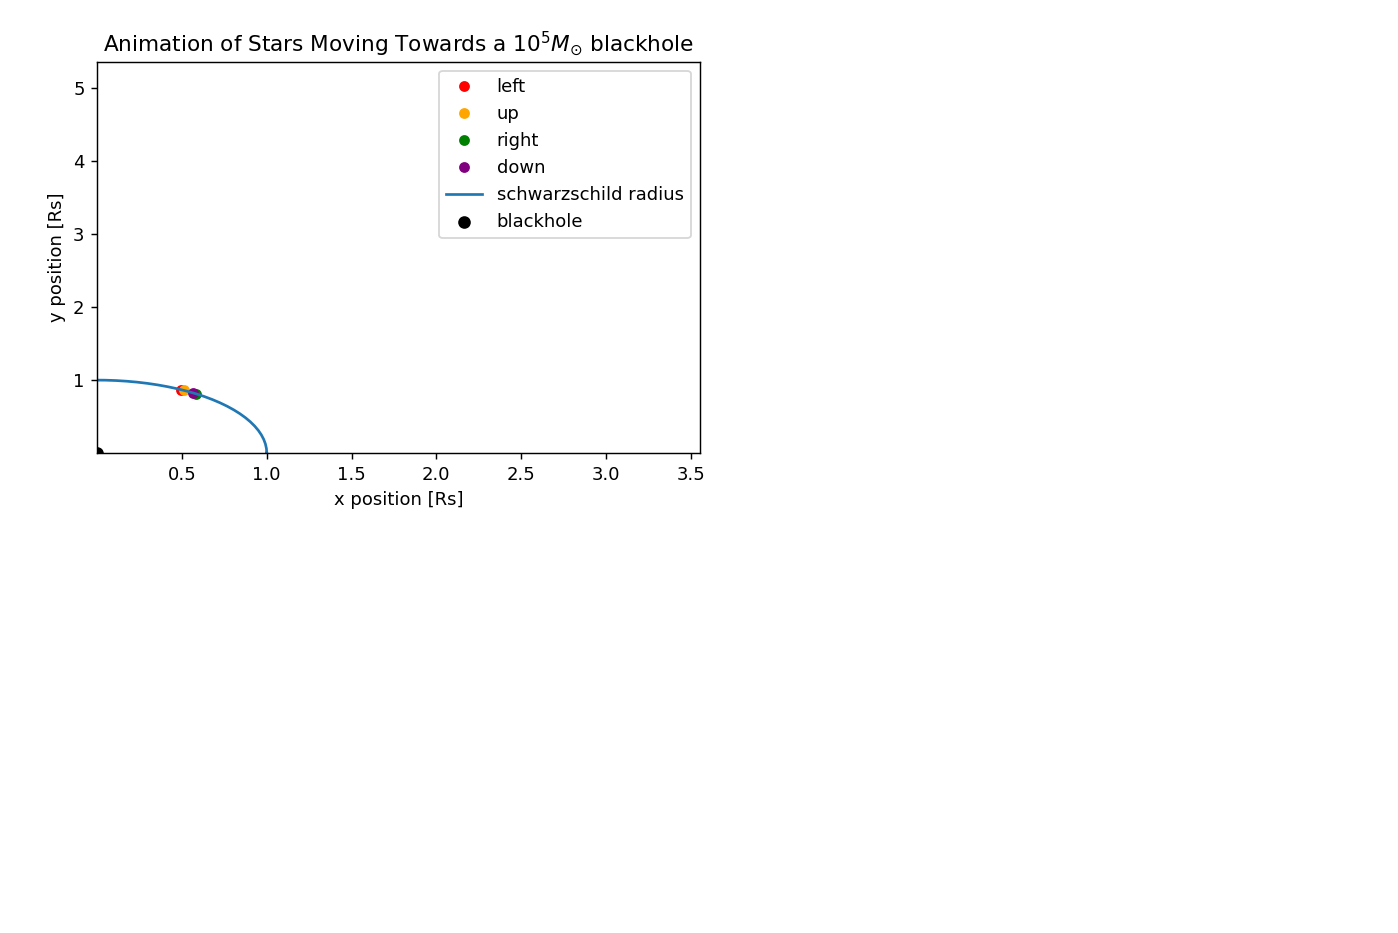

In [18]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], 'o', color='red', markersize=5, label = "left")
line2, = ax.plot([], [], 'o', color='orange', markersize=5, label = "up")
line3, = ax.plot([], [], 'o', color='green', markersize=5, label = "right")
line4, = ax.plot([], [], 'o', color='purple', markersize=5, label = "down")
allx = np.concatenate([x_arrayA_p, x_arrayB_p, x_arrayC_p, x_arrayD_p])
ally = np.concatenate([y_arrayA_p, y_arrayB_p, y_arrayC_p, y_arrayD_p])
ax.set_xlim(2000/rs, (np.max(allx) + 2000)/rs)
ax.set_ylim(2000/rs, (np.max(ally) + 2000)/rs)
def init():
    ax.scatter(0,0, c = 'k', label = "blackhole")
    plt.plot(rsx/rs,rsy/rs, label = "schwarzschild radius")
    plt.legend()
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4,
def update(frame):
    if frame < len(x_arrayA_p[1::10]):
        line1.set_data((x_arrayA_p[1::10][frame])/rs, (y_arrayA_p[1::10][frame])/rs)
    if frame < len(x_arrayB_p[1::10]):
        line2.set_data(x_arrayB_p[1::10][frame]/rs, (y_arrayB_p[1::10][frame])/rs)
    if frame < len(x_arrayC_p[1::10]):
        line3.set_data(x_arrayC_p[1::10][frame]/rs, (y_arrayC_p[1::10][frame])/rs)
    if frame < len(x_arrayD_p[1::10]):
        line4.set_data(x_arrayD_p[1::10][frame]/rs, (y_arrayD_p[1::10][frame])/rs)
    return line1, line2, line3, line4,
ani = animation.FuncAnimation(fig, update, frames=len(x_arrayC_p[1::10]), init_func=init, blit=True, repeat=False, interval = 1)
ax.legend()
ax.title.set_text('Animation of Stars Moving Towards a $10^5 M_{\odot}$ blackhole')
plt.xlabel("x position [Rs]")
plt.ylabel("y position [Rs]")
plt.show()

To compare the two simulation results, I plot 2 subplots as shown below. The left one illustrate the star path in Schwarzschild Metric, while the right one illutrate the that using newtonian. We can see that the general trend of both simulations is the same. However, the time that takes the star to travel into the blackhole varies greatly. It takes less than 30 seconds in the newtonian case, while it takes over 174 days in Schwarzschild Metric. This might be due to the speed limit c when consider general relativity. Moreover, the star path of the newtonian seems to be more curved than the schwarzschild one. The star looks more stretched out in the newtonian calculation, since the points closer to the BH experienced a much larger force that the speed difference is huge, and $dt$ magnifies the distance difference.

<IPython.core.display.Javascript object>


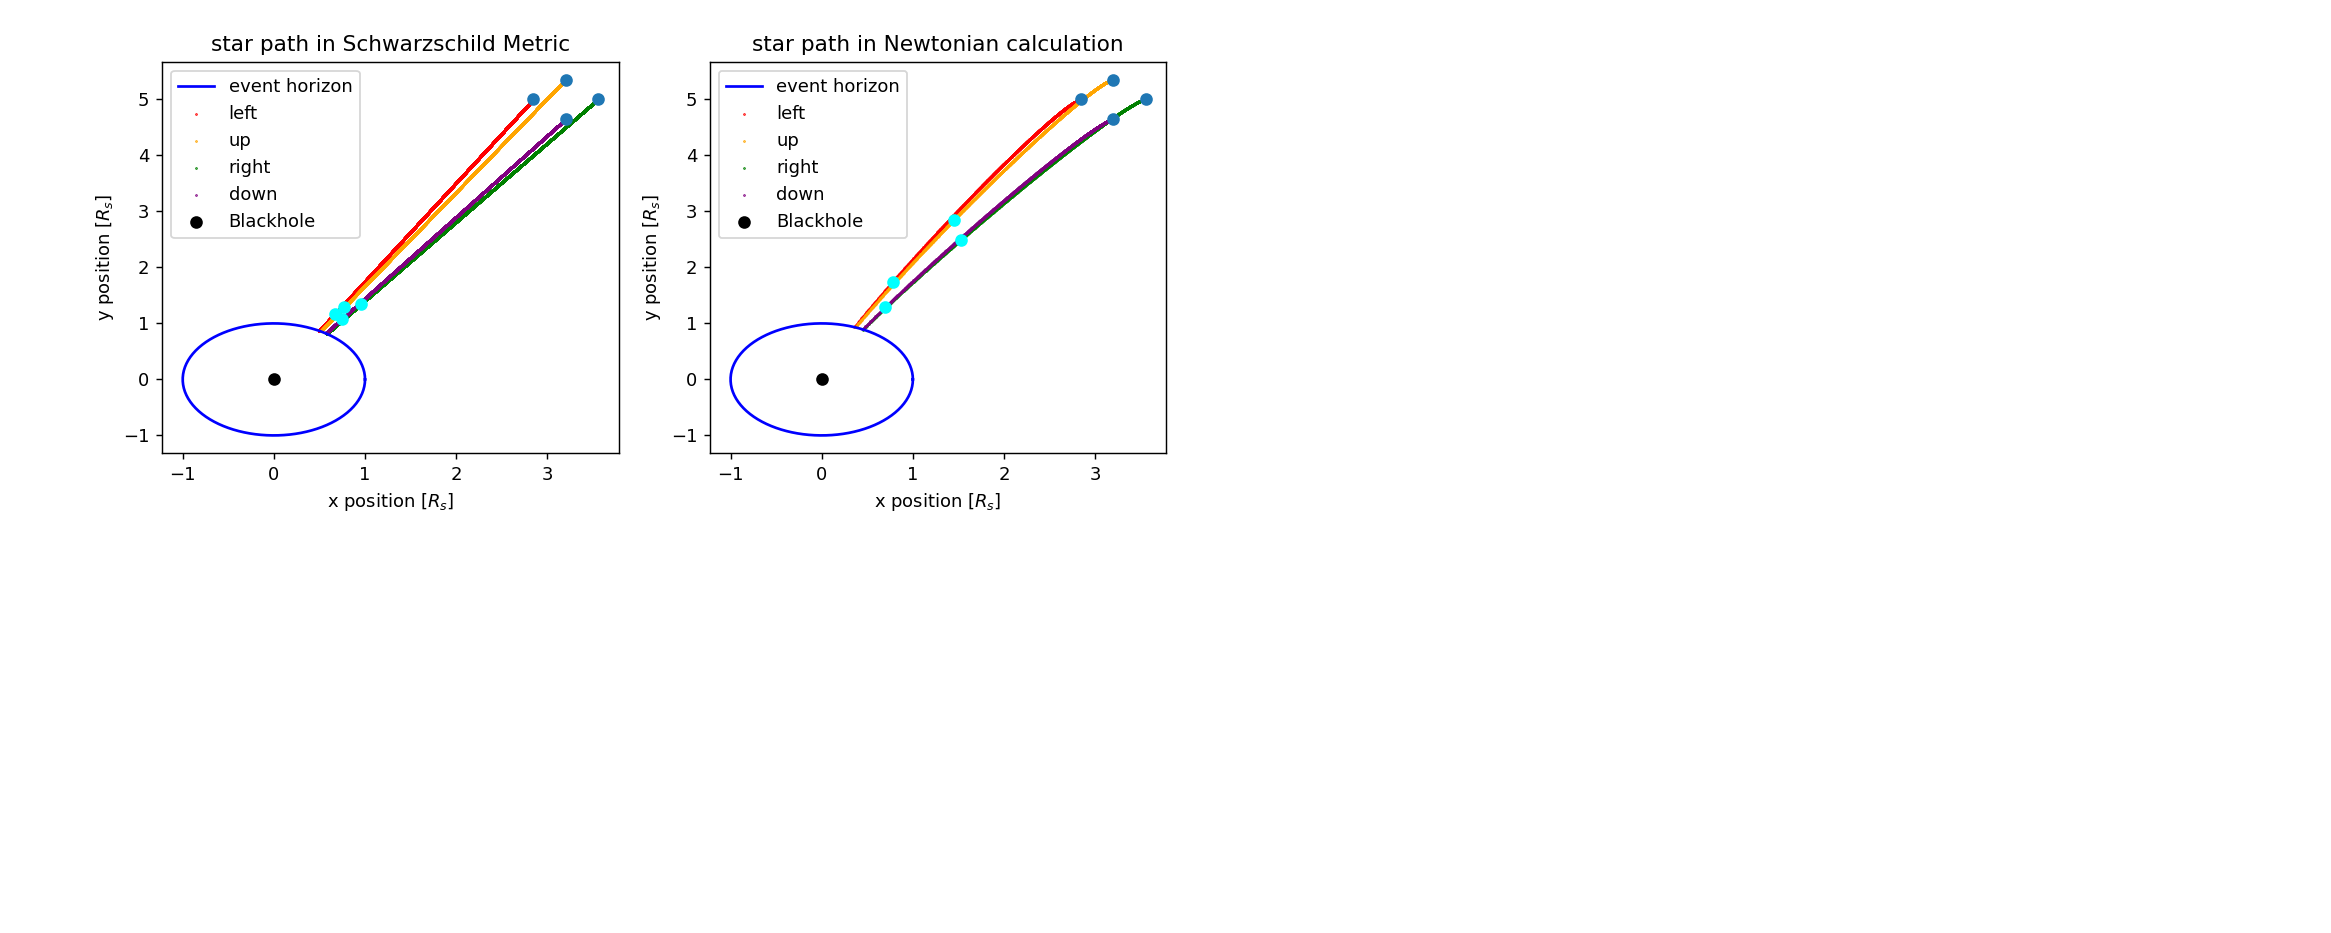

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(x_arrayA_p/rs, y_arrayA_p/rs, s = 0.2, c = 'r', label = "left")
ax1.scatter(x_arrayB_p/rs, y_arrayB_p/rs, s = 0.2, c = 'orange', label = "up")
ax1.scatter(x_arrayC_p/rs, y_arrayC_p/rs, s = 0.2, c = 'green', label = "right")
ax1.scatter(x_arrayD_p/rs, y_arrayD_p/rs, s = 0.2, c = 'purple', label = "down")
ax1.scatter([x_arrayA_p[0]/rs,x_arrayB_p[0]/rs, x_arrayC_p[0]/rs, x_arrayD_p[0]/rs], [y_arrayA_p[0]/rs, y_arrayB_p[0]/rs, y_arrayC_p[0]/rs, y_arrayD_p[0]/rs])
ax1.scatter([x_arrayA_p[14000]/rs,x_arrayB_p[14000]/rs, x_arrayC_p[14000]/rs, x_arrayD_p[14000]/rs], [y_arrayA_p[14000]/rs, y_arrayB_p[14000]/rs, y_arrayC_p[14000]/rs, y_arrayD_p[14000]/rs], c = 'cyan')
ax1.scatter(0,0, c = 'k', label = "Blackhole")
ax1.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
ax1.legend()
ax1.set_title(r'star path in Schwarzschild Metric')
ax1.set_xlabel(r'x position [$R_s$]')
ax1.set_ylabel("y position [$R_s$]");
ax2.scatter(x_arrayA/rs, y_arrayA/rs, s = 0.2, c = 'r', label = "left")
ax2.scatter(x_arrayB/rs, y_arrayB/rs, s = 0.2, c = 'orange', label = "up")
ax2.scatter(x_arrayC/rs, y_arrayC/rs, s = 0.2, c = 'green', label = "right")
ax2.scatter(x_arrayD/rs, y_arrayD/rs, s = 0.2, c = 'purple', label = "down")
ax2.scatter([x_arrayA[0]/rs,x_arrayB[0]/rs, x_arrayC[0]/rs, x_arrayD[0]/rs], [y_arrayA[0]/rs, y_arrayB[0]/rs, y_arrayC[0]/rs, y_arrayD[0]/rs])
ax2.scatter([x_arrayA[1900]/rs,x_arrayB[1900]/rs, x_arrayC[1900]/rs, x_arrayD[1900]/rs], [y_arrayA[1900]/rs, y_arrayB[1900]/rs, y_arrayC[1900]/rs, y_arrayD[1900]/rs], c = 'cyan')
ax2.scatter(0,0, c = 'k', label = "Blackhole")
ax2.plot(rsx/rs,rsy/rs, c = 'blue', label = "event horizon")
ax2.legend()
ax2.set_title("star path in Newtonian calculation")
ax2.set_xlabel(r'x position [$R_s$]')
ax2.set_ylabel("y position [$R_s$]");

## 2.5 Conclusion and Future Work

In section 2, we explored two main ways of simulating a star's trajectory near a blackhole. We first derive and implement the formula to update the positions and velocities using newtonian methods. This simulation provides a correct general trend, but the accuracy goes down as it gets closer to the BH. The spaghettification phenomenon is observed, but the speed of the star exceeds the speed of light when it's closer to the BH. 

So we change to our second way - simulating the star's track in Schwarzschild Metric - so relativistic effect and the curvature of the spacetime metric will be considered. We derived the formula from Schwarzschild Metric and geodesics, and implement them to simulate the path. We found out that it correctly predicted the time dilation effect. However, while the star does appear to be distorted, it looks more like it got compressed than stretched. We think this might be due to the memory limitation and the python's floating-point rounding problem. This make this simulation to be very dependent on the initial condition, so the currently it cannot deal with as many initial conditions as the Newtonian one.

Comparing these two simulations, we found out that the general trend of the paths are the same, but the newtonian way gives a more curly path. It takes much longer for the star to reach the event horizon in the Schwarzschild Metric. 

If we have a better computational computer that have higher RAM, we can make $d\tau$ smaller and get a more accurate simulation. Moreover, we could make convert all the float numbers into doubles, which might preserve more digital precisions. Futuristic work can also be done in dividing the stars into and simulating more point masses. They can also add the spin of blackhole and the star to get a more realistic simulation. 